In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set()

In [2]:
df=pd.read_csv("C:\\Users\\syamk\\Desktop\\6th sem\\ba\\project\\archive (3)\\bengaluru.csv",parse_dates=['date_time'], index_col='date_time')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2009-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           96432 non-null  int64  
 1   mintempC           96432 non-null  int64  
 2   totalSnow_cm       96432 non-null  int64  
 3   sunHour            96432 non-null  float64
 4   uvIndex            96432 non-null  int64  
 5   uvIndex.1          96432 non-null  int64  
 6   moon_illumination  96432 non-null  int64  
 7   moonrise           96432 non-null  object 
 8   moonset            96432 non-null  object 
 9   sunrise            96432 non-null  object 
 10  sunset             96432 non-null  object 
 11  DewPointC          96432 non-null  int64  
 12  FeelsLikeC         96432 non-null  int64  
 13  HeatIndexC         96432 non-null  int64  
 14  WindChillC         96432 non-null  int64  
 15  WindGustKmph       96432 non-null  

In [4]:
df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,0,11.6,5,1,31,9:58 AM,10:03 PM,6:42 AM,...,18,11,2,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,27,12,0,11.6,5,1,31,9:58 AM,10:03 PM,6:42 AM,...,17,9,2,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,27,12,0,11.6,5,1,31,9:58 AM,10:03 PM,6:42 AM,...,16,7,2,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,27,12,0,11.6,5,1,31,9:58 AM,10:03 PM,6:42 AM,...,15,5,2,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,27,12,0,11.6,5,1,31,9:58 AM,10:03 PM,6:42 AM,...,18,5,1,88,0.0,1015,14,5,45,3


In [5]:
df.drop('totalSnow_cm',axis=1,inplace=True)
df.drop('maxtempC',axis=1,inplace=True)
df.drop('mintempC',axis=1,inplace=True)
df.drop('uvIndex.1',axis=1,inplace=True)
df.drop('moonrise',axis=1,inplace=True)
df.drop('moonset',axis=1,inplace=True)
df.drop('sunrise',axis=1,inplace=True)
df.drop('sunset',axis=1,inplace=True)
df.drop('cloudcover',axis=1,inplace=True)

In [6]:
df.head()

,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,
2009-01-01 00:00:00,11.6,5,31,16,18,18,18,11,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,11.6,5,31,16,17,17,17,9,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,11.6,5,31,15,16,16,16,7,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,11.6,5,31,15,15,15,15,5,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,11.6,5,31,15,18,18,18,5,88,0.0,1015,14,5,45,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2009-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sunHour            96432 non-null  float64
 1   uvIndex            96432 non-null  int64  
 2   moon_illumination  96432 non-null  int64  
 3   DewPointC          96432 non-null  int64  
 4   FeelsLikeC         96432 non-null  int64  
 5   HeatIndexC         96432 non-null  int64  
 6   WindChillC         96432 non-null  int64  
 7   WindGustKmph       96432 non-null  int64  
 8   humidity           96432 non-null  int64  
 9   precipMM           96432 non-null  float64
 10  pressure           96432 non-null  int64  
 11  tempC              96432 non-null  int64  
 12  visibility         96432 non-null  int64  
 13  winddirDegree      96432 non-null  int64  
 14  windspeedKmph      96432 non-null  int64  
dtypes: float64(2), int64(13)
memory usa

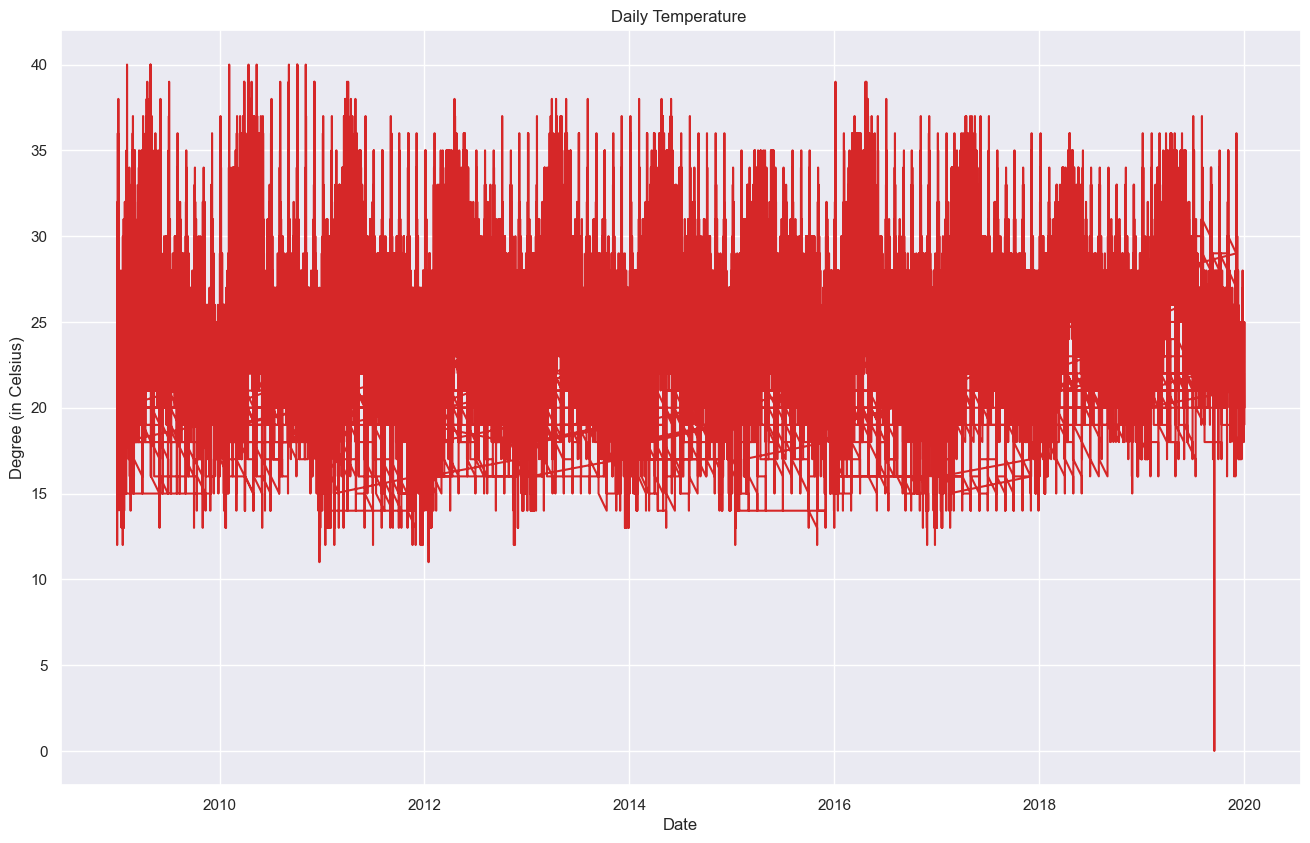

In [79]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(df.index, df.tempC, color='tab:red')
plt.gca().set(title="Daily Temperature ", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

<AxesSubplot:xlabel='date_time'>

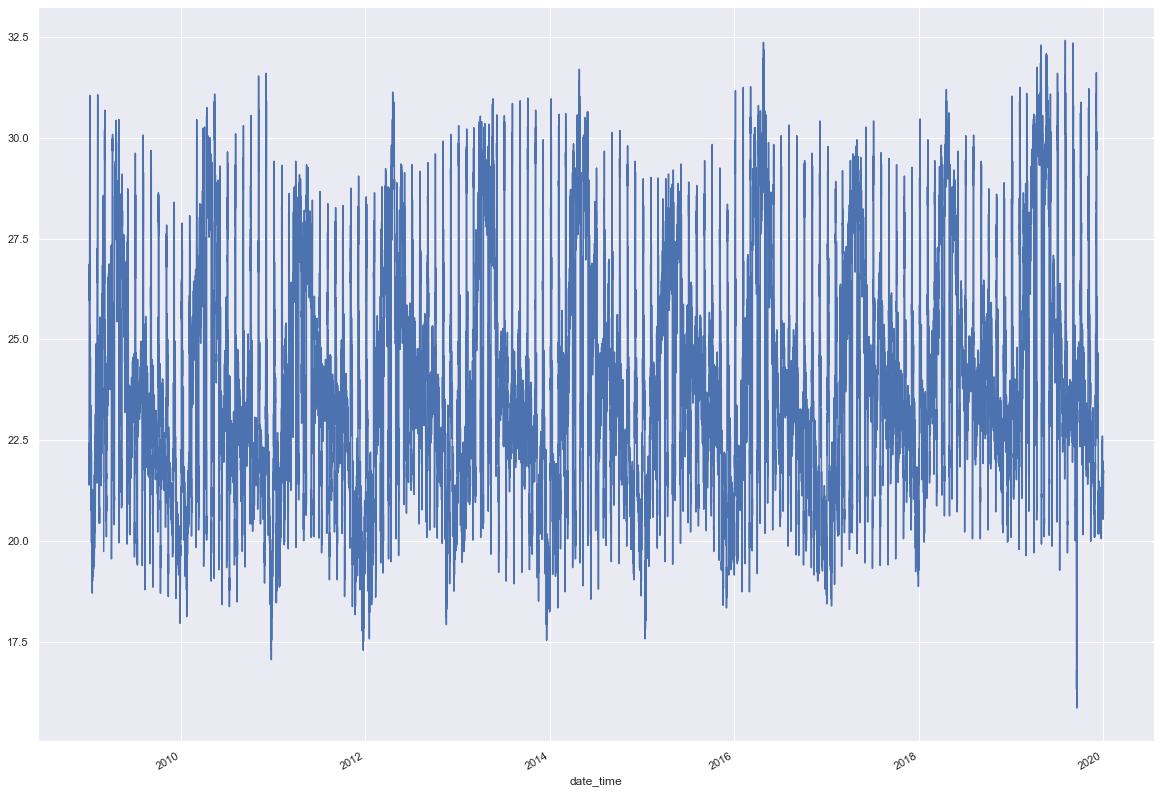

In [86]:
temp_df_mean = df.tempC.rolling(window=60).mean()
temp_df_mean.plot(figsize=(20,15))

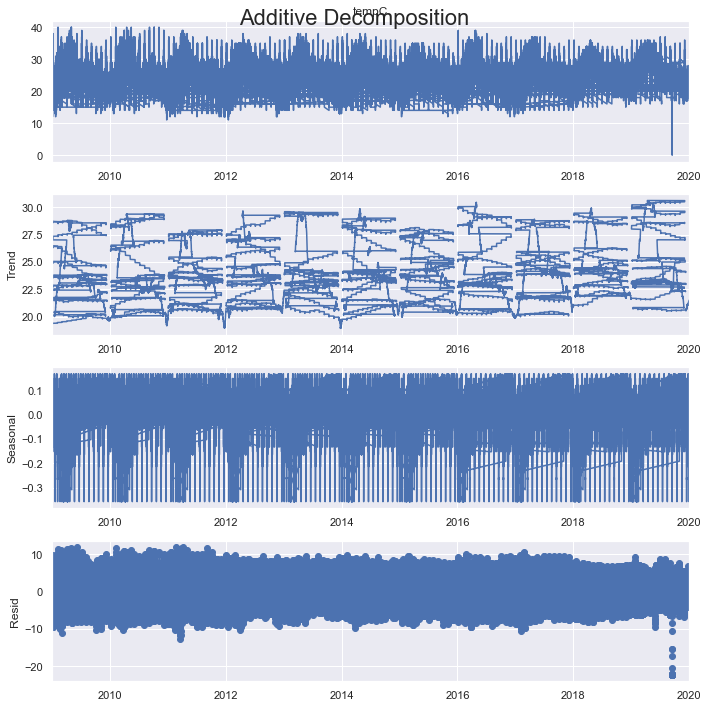

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df.tempC, model='additive', extrapolate_trend='freq', freq=365)

plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

In [8]:
def rollings(kapardhi):
    mr= kapardhi.rolling(30).mean()
    sr= kapardhi.rolling(30).std()
    plt.figure(figsize=(22,10))
    plt.plot(kapardhi, label='Actual Mean')
    plt.plot(mr, label='roll mean')
    plt.plot(sr, label = 'rol std')
    plt.xlabel("dt")
    plt.ylabel("mean temp")
    plt.title('r mean and r std')
    plt.legend()
    plt.show()

def pdft(kapardhi):
    result = adfuller(kapardhi, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])
    print('P value', result[1])
    print(result)

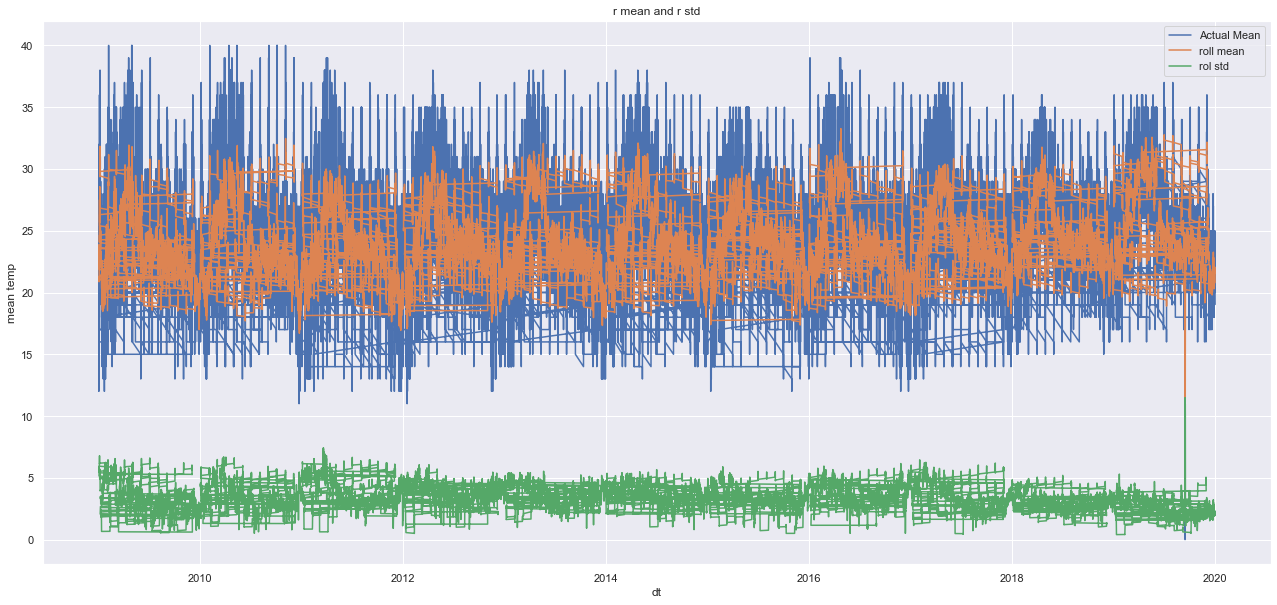

Test statistic:  -7.849263579622407
Critical Values: {'1%': -3.4304178622120522, '5%': -2.8615699940220614, '10%': -2.566785964770556}
P value 5.6586120697407855e-12
(-7.849263579622407, 5.6586120697407855e-12, 67, 96364, {'1%': -3.4304178622120522, '5%': -2.8615699940220614, '10%': -2.566785964770556}, 152558.29659647588)


In [9]:
rollings(df.tempC)
pdft(df.tempC)

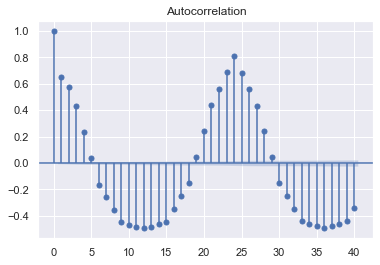

In [10]:
sm.graphics.tsa.plot_acf(df.tempC.diff().dropna().values,lags=40)
plt.show()

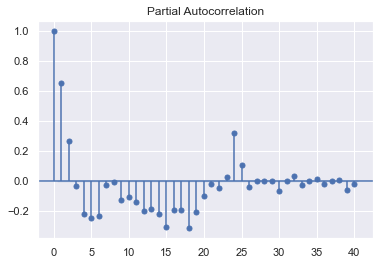

In [11]:
sm.graphics.tsa.plot_pacf(df.tempC.diff().dropna().values.squeeze(), lags=40, method="ywm")
plt.show()

C:\Users\syamk\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


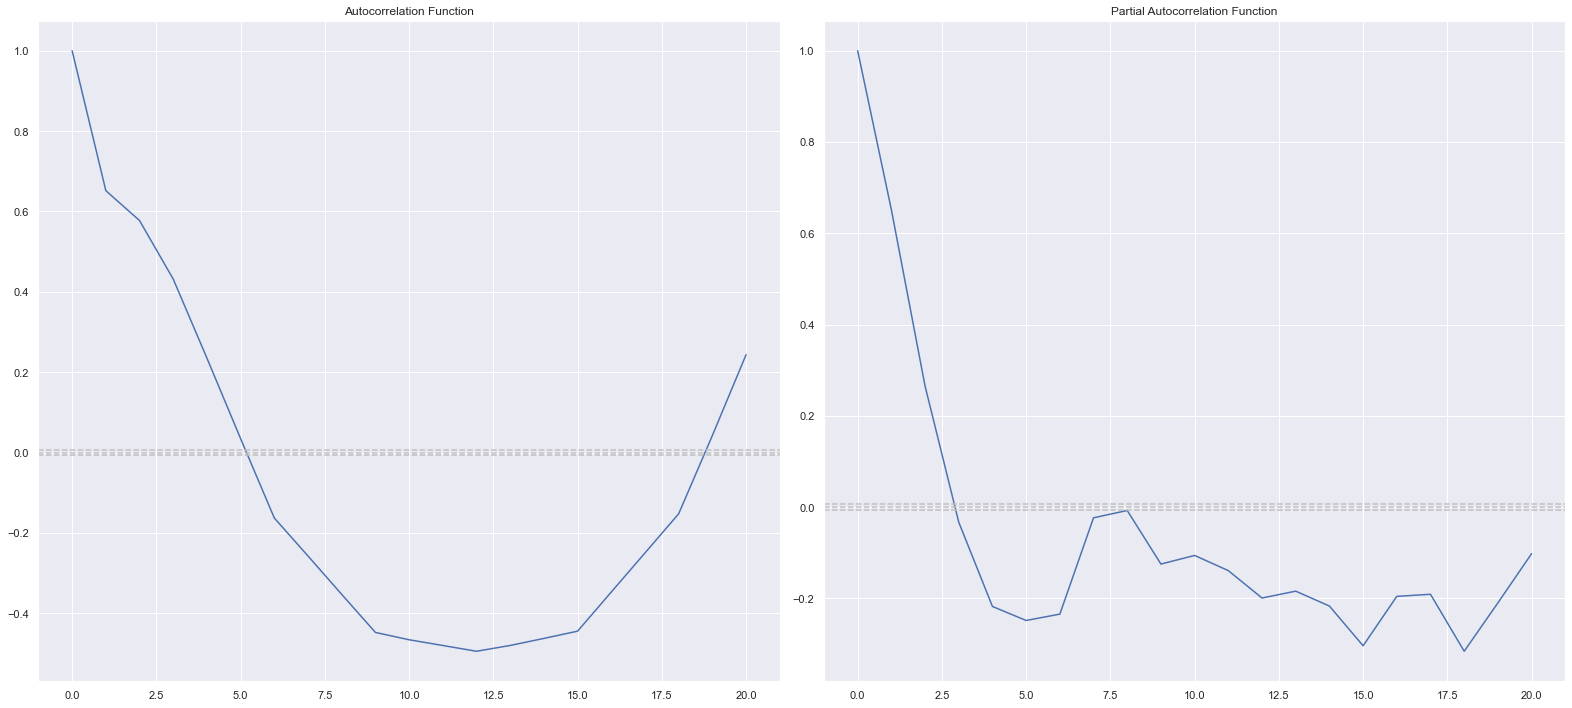

In [12]:
acf_lag = acf(df.tempC.diff().dropna().values, nlags=20)
pacf_lag = pacf(df.tempC.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [24]:
mod = sm.tsa.arima.ARIMA(df.tempC.values, order=(3, 0, 5))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                96432
Model:                 ARIMA(3, 0, 5)   Log Likelihood             -108075.919
Date:                Mon, 16 May 2022   AIC                         216171.839
Time:                        20:30:42   BIC                         216266.605
Sample:                             0   HQIC                        216200.645
                              - 96432                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9729      0.040    601.382      0.000      23.895      24.051
ar.L1          1.9471      0.540      3.609      0.000       0.890       3.005
ar.L2         -1.1669      0.934     -1.250      0.2

In [60]:
train_df = df.tempC['2009':'2017'].resample('M').mean().fillna(method='pad')
test_df = df.tempC['2017':'2020'].resample('M').mean().fillna(method='pad')

In [78]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)



warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.tempC,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [69]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.tempC,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

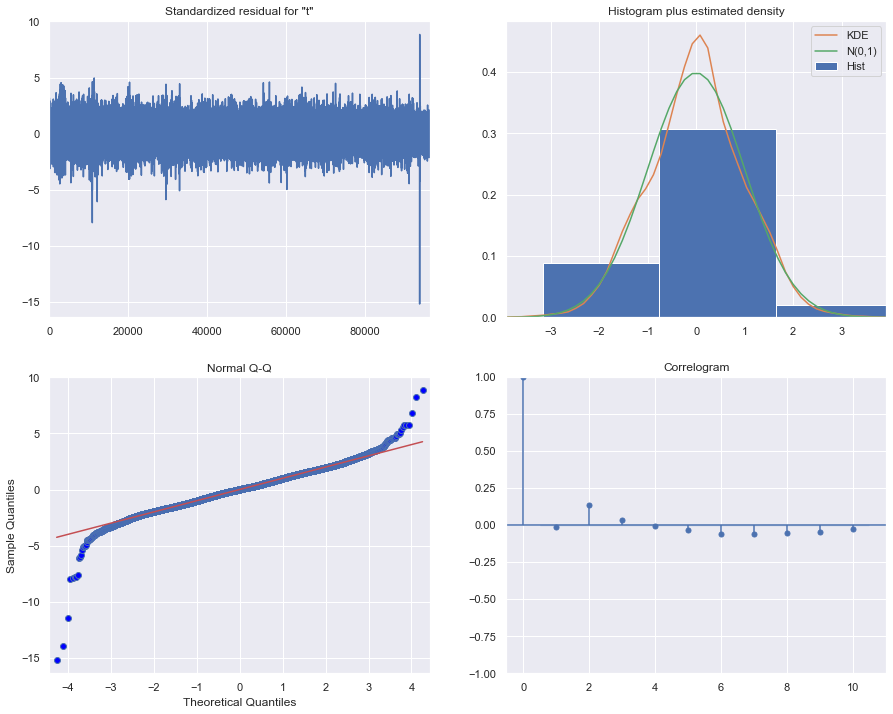

In [70]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [71]:
pred = results.get_prediction(start=pd.to_datetime('2017-05-19'), dynamic=False)
pred_ci = pred.conf_int()

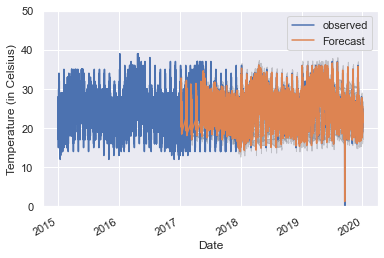

In [75]:
ax = df.tempC['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([0,50])
plt.legend()
plt.show()